In [2]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import scipy
import numpy as np
%matplotlib inline

Esse notebook tem o objetivo de analisar os resultados ao variar o tamanho da população e gerações mantendo todo o resto constante para o dataset concrete. 

Esse notebook é uma cópia do notebook 1, apenas com os dados alterados.

# 1 - Fitness por execução

In [3]:
results_folder_path = pathlib.Path('../../results/')

## 1.1 - População de 50 indivíduos

In [4]:
def get_fitness_data_per_config(folders_paths) -> list[dict]:
    data_per_config = dict()
    for target_folder in folders_paths:
        fitness_stats_path = target_folder / 'fitness_stats.csv'
        print(fitness_stats_path)
        stats_df = pd.read_csv(fitness_stats_path)
        config_name = str(target_folder).split('/')[-1].split('_')[1]
        data_per_config[config_name] = stats_df
    return data_per_config

In [5]:
pop_50_results_folders = list(results_folder_path.glob("concrete/50pop*"))
data_per_config50 = get_fitness_data_per_config(pop_50_results_folders)

../../results/concrete/50pop_100gen/fitness_stats.csv
../../results/concrete/50pop_50gen/fitness_stats.csv
../../results/concrete/50pop_500gen/fitness_stats.csv


In [6]:
data_per_config50['100gen'].head()

,train_fit,test_fit,train_time_seconds,random_seed
0,16.804666,16.304275,4.937738,91
1,16.804666,16.304275,2.999035,250
2,16.804666,16.304275,5.191387,73
3,15.181832,14.526828,11.342626,247
4,16.336313,16.264258,8.583293,473


In [7]:
def plot_fitness_results(data_dict, num_inds, num_runs=30, base_dados='concrete'):
    train_data_colors = {'100gen':'red', 
                     '50gen':'green', 
                     '500gen':'grey'}

    test_data_colors = {'100gen':'orange', 
                     '50gen':'cyan', 
                     '500gen':'black'}

    x = range(num_runs)
    fig, ax = plt.subplots(figsize=(9, 6))
    for config, data in data_dict.items():
            ax.plot(x, data['train_fit'], color=train_data_colors[config], label=config+" train")
            ax.plot(x, data['test_fit'], color=test_data_colors[config], label=config+" test")

    plt.title(f"Melhor Fitness treino e teste base {base_dados} para {num_inds} indivíduos")
    plt.xlabel("Número da Execução")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

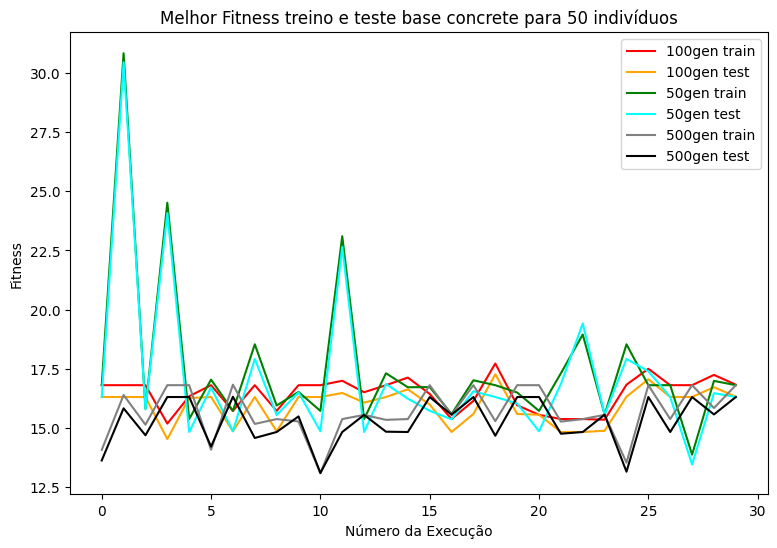

In [8]:
plot_fitness_results(data_per_config50, num_inds=50)

In [9]:
def get_trimmed_mean_train_test_fitness(data_dict, trim=0.05)-> dict[str, dict]:
    config_dict_results = dict()
    for config, data in data_dict.items():
        config_dict_results[config] = dict()
        config_dict_results[config]['train'] = scipy.stats.trim_mean(data.train_fit, trim)
        config_dict_results[config]['test'] = scipy.stats.trim_mean(data.test_fit, trim)
    return config_dict_results

In [10]:
pop50_mean_results = get_trimmed_mean_train_test_fitness(data_per_config50)
pop50_mean_results

{'100gen': {'train': 16.442146711169947, 'test': 15.952834383584753},
 '50gen': {'train': 17.162936371893387, 'test': 16.74863192557238},
 '500gen': {'train': 15.718843502831286, 'test': 15.31846369905892}}

De acordo com os resultados, para a população de 50 indivíduos, ao usar 500 indivíduos, conseguimos os melhores resultados, o que já era esperado. Entretanto, no geral, a média é bem parecida entre todas as quantidades máximas de gerações.

## 1.2 - População de 100 indivíduos

In [11]:
pop_100_results_folders = list(results_folder_path.glob("concrete/100pop*_*gen/"))
data_per_config100 = get_fitness_data_per_config(pop_100_results_folders)

../../results/concrete/100pop_50gen/fitness_stats.csv
../../results/concrete/100pop_500gen/fitness_stats.csv
../../results/concrete/100pop_100gen/fitness_stats.csv


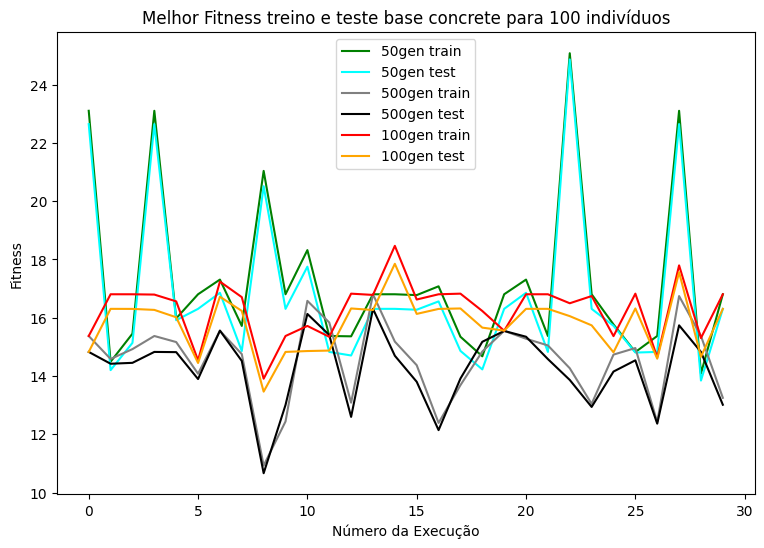

In [12]:
plot_fitness_results(data_per_config100, num_inds=100)

In [13]:
pop100_mean_results = get_trimmed_mean_train_test_fitness(data_per_config100)
pop100_mean_results

{'50gen': {'train': 17.08898899716416, 'test': 16.634853465763676},
 '500gen': {'train': 14.602458799234208, 'test': 14.32456267753243},
 '100gen': {'train': 16.30316516642125, 'test': 15.816910352551123}}

## 1.3 - População de 500 indivíduos

In [14]:
pop_500_results_folders = list(results_folder_path.glob("concrete/500pop*"))
data_per_config500 = get_fitness_data_per_config(pop_500_results_folders)

../../results/concrete/500pop_50gen/fitness_stats.csv
../../results/concrete/500pop_100gen/fitness_stats.csv


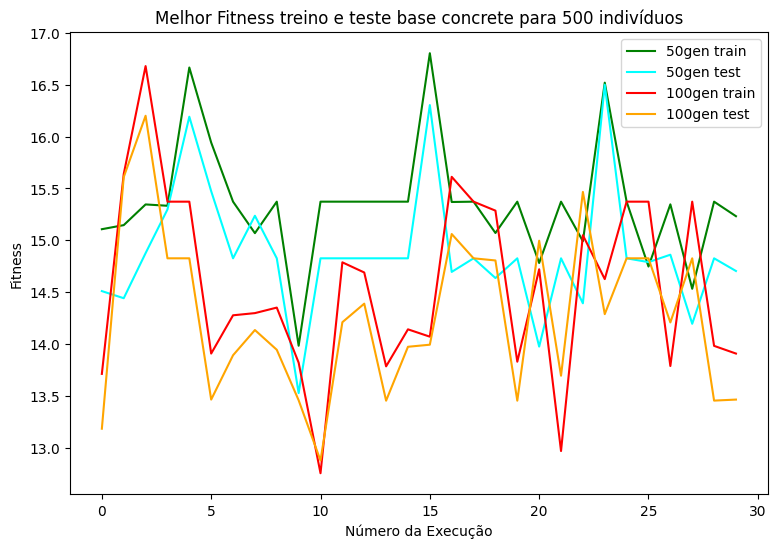

In [15]:
plot_fitness_results(data_per_config500, num_inds=500)

In [16]:
pop500_mean_results = get_trimmed_mean_train_test_fitness(data_per_config500)
pop500_mean_results

{'50gen': {'train': 15.345536331355211, 'test': 14.874745274761564},
 '100gen': {'train': 14.552713126710254, 'test': 14.26942948305259}}

[]

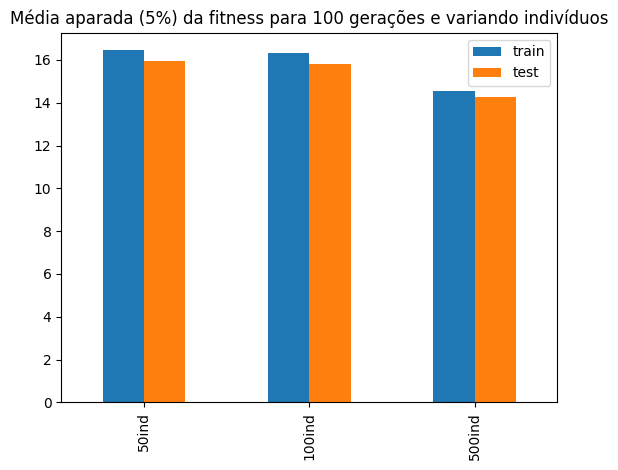

In [152]:
target_config = '100gen'
dicts_list = [pop50_mean_results ,
              pop100_mean_results,
              pop500_mean_results]

train_stats = [data[target_config]['train'] if target_config in data else None for data in dicts_list]
test_stats = [data[target_config]['test'] if target_config in data else None for data in dicts_list]
train_test_fits_df = pd.DataFrame({'train':train_stats, 'test':test_stats}, index=['50ind', '100ind', '500ind'])
axs = train_test_fits_df.plot(kind='bar')
axs.set_title("Média aparada (5%) da fitness para 100 gerações e variando indivíduos")
axs.plot()

# 2 - Tempo de execução

In [153]:
def get_trimmed_mean_train_time(data_dict, trim=0.05)-> dict[str, dict]:
    config_dict_results = dict()
    for config, data in data_dict.items():
        config_dict_results[config] = scipy.stats.trim_mean(data.train_time_seconds, trim)
    return config_dict_results

In [154]:
pop50_mean_time = get_trimmed_mean_train_time(data_per_config50)
pop100_mean_time = get_trimmed_mean_train_time(data_per_config100)
pop500_mean_time = get_trimmed_mean_train_time(data_per_config500)
pop100_mean_time

{'50gen': 6.664852840559823,
 '500gen': 127.75433250835964,
 '100gen': 17.68350217172078}

In [155]:
df_dict = {}
times_dicts_list = [pop50_mean_time, pop100_mean_time, pop500_mean_time]
for target_config in ['50gen', '100gen', '500gen']:
    df_dict[target_config] = [data[target_config] if target_config in data else None for data in times_dicts_list]

train_times_df = pd.DataFrame(df_dict, index=['50ind', '100ind', '500ind'])
train_times_df

,50gen,100gen,500gen
50ind,4.378907,8.670814,48.898672
100ind,6.664853,17.683502,127.754333
500ind,42.260366,95.192013,NaN


Text(0, 0.5, 'Tempo execução médio (s)')

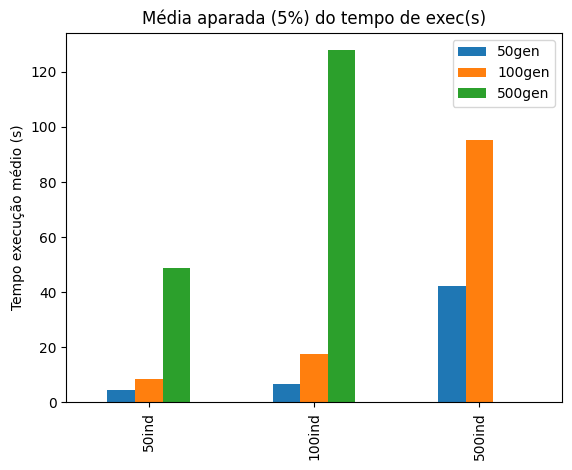

In [156]:
axs = train_times_df.plot(kind='bar')
axs.set_title("Média aparada (5%) do tempo de exec(s)")
axs.set_ylabel("Tempo execução médio (s)")

# 3 - Seeds dos melhores resultados para teste

As seeds que foram usadas para gerar os melhores resultados com 500 gerações para cada indivíduo foram:

In [164]:
def get_best_test_line_for_gen(num_gens):
    target = f'{num_gens}gen'
    config50 = data_per_config50[target]
    config100 = data_per_config100[target]
    print(f"Melhor linha para 50 indivíduos: ")
    print(config50[config50.test_fit == config50.test_fit.min()])
    print(f"Melhor linha para 100 indivíduos: ")
    print(config100[config100.test_fit == config100.test_fit.min()])
    if num_gens != 500:
        config500 = data_per_config500[target]
        print(f"Melhor linha para 500 indivíduos: ")
        print(config500[config500.test_fit == config500.test_fit.min()])

In [165]:
get_best_test_line_for_gen(50)

Melhor linha para 50 indivíduos: 
    train_fit  test_fit  train_time_seconds  random_seed
27  13.870198  13.45303            5.535781          308
Melhor linha para 100 indivíduos: 
    train_fit  test_fit  train_time_seconds  random_seed
28  14.084328  13.84301             6.03238          209
Melhor linha para 500 indivíduos: 
   train_fit   test_fit  train_time_seconds  random_seed
9   13.98296  13.526063           44.851232          845


In [166]:
get_best_test_line_for_gen(100)

Melhor linha para 50 indivíduos: 
   train_fit   test_fit  train_time_seconds  random_seed
3  15.181832  14.526828           11.342626          247
Melhor linha para 100 indivíduos: 
   train_fit   test_fit  train_time_seconds  random_seed
8  13.907434  13.463444           11.386559          119
Melhor linha para 500 indivíduos: 
    train_fit   test_fit  train_time_seconds  random_seed
10   12.75306  12.875926          104.285182          557


In [167]:
get_best_test_line_for_gen(500)

Melhor linha para 50 indivíduos: 
    train_fit   test_fit  train_time_seconds  random_seed
10  13.084149  13.093225          145.955184          284
Melhor linha para 100 indivíduos: 
   train_fit   test_fit  train_time_seconds  random_seed
8  10.927778  10.663643          225.471627          513


# 4 - Fitness ao longo das 100 gerações

In [176]:
def get_500_gen_stats_df_dict_by_run_of_folder(base_folder):
    for folder in list(base_folder):
        if str(folder).split("_")[-1] == '100gen':
            files = list(folder.glob("stats*"))
            stats_dict = dict()
            for file in files:
                file_num = str(file).split('_')[-1].split('.')[0]
                stats_dict[int(file_num)] = pd.read_csv(file)
            return stats_dict

In [177]:
pop_100_results_folders

[PosixPath('../../results/concrete/100pop_50gen'),
 PosixPath('../../results/concrete/100pop_500gen'),
 PosixPath('../../results/concrete/100pop_100gen')]

In [179]:
pop_50_stats_by_run = get_500_gen_stats_df_dict_by_run_of_folder(pop_50_results_folders)
pop_100_stats_by_run = get_500_gen_stats_df_dict_by_run_of_folder(pop_100_results_folders)
pop_500_stats_by_run = get_500_gen_stats_df_dict_by_run_of_folder(pop_500_results_folders)

In [180]:
pop_100_stats_by_run[0].shape

(100, 7)

In [183]:
def get_line_and_col_of_runs(df_dict, target_line, target_cols:list):
    results_list_of_dicts = list()
    for df_num, df in df_dict.items():
        results_list_of_dicts.append(df.iloc[target_line][target_cols].to_dict())
    
    return pd.DataFrame(results_list_of_dicts)

def get_col_stats_from_dfs_dict(df_dict, target_col):
    records_list = list()
    for gen in range(100):
        curr_values = get_line_and_col_of_runs(df_dict, gen, [target_col]).values.flatten()
        min_value = np.min(curr_values)
        max_value = np.max(curr_values)
        mean_value = np.mean(curr_values)
        new_record = {'min_value':min_value, 'max_value':max_value, 'mean_value':mean_value}
        records_list.append(new_record)

    return pd.DataFrame.from_records(records_list)

In [184]:
best_fit_per_gen_50_pop_df = get_col_stats_from_dfs_dict(pop_50_stats_by_run, 'best_fit')
best_fit_per_gen_100_pop_df = get_col_stats_from_dfs_dict(pop_100_stats_by_run, 'best_fit')
best_fit_per_gen_500_pop_df = get_col_stats_from_dfs_dict(pop_500_stats_by_run, 'best_fit')

In [185]:
def plot_fill_between(stats_df, my_axs, label:str):
    x = range(len(stats_df))
    y = stats_df['mean_value']
    y1 = stats_df['min_value']
    y2 = stats_df['max_value']
    my_axs.plot(x, y, '-', label=label)
    my_axs.fill_between(x, y1, y2, alpha=0.2)

Text(0.5, 1.0, 'Best Fitness média (com max e min) ao longo das gerações entre 30 execuções')

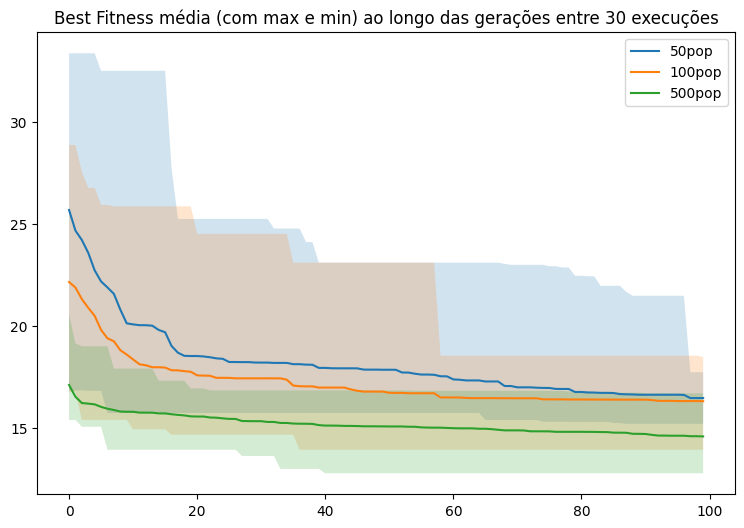

In [186]:
fig, ax = plt.subplots(figsize=(9, 6))
plot_fill_between(best_fit_per_gen_50_pop_df, ax, '50pop')
plot_fill_between(best_fit_per_gen_100_pop_df, ax, '100pop')
plot_fill_between(best_fit_per_gen_500_pop_df, ax, '500pop')

ax.legend()
ax.set_title("Best Fitness média (com max e min) ao longo das gerações entre 30 execuções")

Pode-se perceber pelo gráfico que usar 500 indivíduos, em média, gera as melhores soluções. No melhor caso com 100 indivíduos, ficamos abaixo da média do caso com 500 indivíduos e com uma pequena diferença, considerando a magnitude das fitness obtidas, com relação ao melhor caso para 500 indivíduos.